# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 12/7/1987
* Student Name: Benjamin Ballard
* Student Net ID: bkq5nt
* This URL: https://github.com/ballard11/DS5100-2022-08-O/blob/main/final-project-info/FinalProjectSubmissionTemplate.ipynb
* GitHub Repo URL: https://github.com/ballard11/DS5100-2022-08-O/tree/main/final-project-info

# The Monte Carlo Module

In [19]:
import numpy as np
import pandas as pd
import random as rm

class Die():

    def __init__(self, faces):
        """ This is the Create_Die docstring
        
        Attributes
        ==========
        faces: int or str
            the number of str on the face of the 'die'
        weights: int
            weight of each corresponding face, relating to liklihood of rolling that face.
        
        Methods
        =======
        change_weight:
            changes the weight of the die
        roll_die:
            plays the dice 'game'
        show:
            shows the results

        """
        
    # The Initializer Method: Takes an array of faces as an argument.
           
        flag = len(set(faces)) == len(faces)
        if flag == 0:
            raise ValueError("Each value must be Unique.") 
    
        #Faces
        #Asigns FACES to self, the length of the User Inputted array
        self.faces = faces
        self.n_faces = len(faces)
        self.weights = np.ones(len(faces))
    
        #Create Dataframe to save values        
        self.my_die= pd.DataFrame({
          #  'Face':range(1,self.n_faces+1),
            'Face':faces,
            'Weight':self.weights})


    def change_weight(self, f_change, weight):
        """ f_change is the name of the face - it could be a str or int"""
        # Changes_Weight Method: changes the weight of a single face provided (x) - Seems to work overall. 

        weight = float(weight)

        #Re-evaluate for string
        if f_change in self.faces:
            #self.my_die.loc[df['Face'] == f_change , "Weight" ] = weight
            self.my_die.loc[self.my_die['Face'] == f_change , "Weight" ] = weight

            #I'm finding 'H/T' and changing the weight.
            print(self.my_die)
        else:
            print("Value is not on the Die.  (i.e. User provided value is not in the array.)")
            #Raise an Error instead.

            
    def roll_die(self, n_rolls=1):
        """A method to roll the die one or more times. """
        Rolled_faces_and_weights_df = self.my_die.sample(n=n_rolls, replace = True, weights = "Weight").reset_index(drop= True)
        return list(Rolled_faces_and_weights_df['Face'])    

                                                
    def show(self, wide_or_narrow = "wide"):
        """A method to show the user the dies current set of faces and weights (since the latter can be changed). """   
        if wide_or_narrow == 'wide':
            return self.my_die
        
        elif wide_or_narrow =='narrow':
            my_die_narrow = self.my_die.stack().to_frame('Faces')
            my_die_narrow.index.rename(["Roll Number","Dice"], inplace = True)
            return my_die_narrow
        else:
            raise ValueError("Arrgument must be either \"narrow\" or \"wide\"")
    
        print(self.my_die)
        
class Game(Die): 
    
    def __init__(self,die_list):
        """Game class docstring: A game consists of rolling of one or more dice of the same kind one or more times.
        
        Attributes
        ==========
        die list:
            Must be passed a list of die created using the Die class.
        faces: int or str
        weights: int
        
        Methods
        =======
        play:
            Takes a parameter to specify how many times the dice should be rolled.
        get_results:
            method shows the user the results of the most recent play.        
        
        """      
        self.die_list=die_list
        self.num_rolls = len(die_list)
        self.results = pd.DataFrame()
        self.my_die = pd.DataFrame()                      

    def play(self, num_rolls):
        self.my_die.index.rename("Roll Number", inplace = True)
        
        for die in range(0, len(self.die_list)):
            self.my_die[die] = self.die_list[die].roll_die(num_rolls)
        
    
    def get_results(self, wide_or_narrow = "wide"):
       # A method to show the user the die’s current set of faces and weights (since the latter can be changed). (X)
       # Returns the dataframe created in the initializer but possibly updated by the weight changing method. (X)
    
        if wide_or_narrow == 'wide':
            return self.my_die
        
        elif wide_or_narrow =='narrow':
            my_die_narrow = self.my_die.stack().to_frame('Faces')
            my_die_narrow.index.rename(["Roll Number","Die"], inplace = True)
            return my_die_narrow
        else:
            raise ValueError("Arrgument must be either \"narrow\" or \"wide\"")
    
    
class Analyzer(Game): 
    """An analyzer takes the results of a single game and computes various descriptive statistical properties about it.
            
        Methods
        =======
        get_face_count:
            A face counts per roll method to compute how many times a given face is rolled in each event.
        get_permutation:
            A combo method to compute the distinct combinations of faces rolled, along with their counts.
        get_jackpot:
            A jackpot method to compute how many times the game resulted in all faces being identical.
    """
    
    def __init__(self, game):
        self.game_results = game.get_results()
        self.number_of_dice = len(list(self.game_results))
        self.jackpot = 0
        self.face_count = pd.DataFrame()
        self.combos = {}
        self.temp_df = pd.DataFrame()
        number_of_dice = 0

    def get_face_count(self):
        """A face counts per roll, i.e. the number of times a given face appeared in each roll. 
         For example, if a roll of five dice has all sixes, then the counts for this roll would be 6 for the face value '6' and 0 for the other faces."""
        self.temp_df = pd.DataFrame(self.game_results.transpose().melt(var_name='rolls',value_name='faces'))
        self.face_counts = pd.crosstab(index=self.temp_df['rolls'],columns=self.temp_df['faces'])
        return self.face_counts
    
    def get_combo(self):
        """A combo count, i.e. how many combination types of faces were rolled and their counts."""
        face_count = self.get_face_count()  
        listtest = face_count.values.tolist()
        for i in listtest:
            value_string = ' '.join(str(e) for e in i)
            self.combos[value_string] = listtest.count(i)    
        return self.combos
          
    def get_jackpot(self, game):
        """A jackpot count, i.e. how many times a roll resulted in all faces being the same, e.g. six ones for a six-sided die."""
        # iterate over the resulting dataframe and find any time a value includes the number of dice rolled and every time that's true you add to jackpot
        face_count = self.get_face_count()
        listtest = face_count.values.tolist()
        print(game.num_rolls)
        for i in listtest:
            if game.num_rolls in i:
                self.jackpot += 1
        return self.jackpot    
    
        
if __name__ == '__main__':
    unittest.main()

# Test Module

In [63]:
# A code block with your test code.
#%pwd
#python MonteCarloUnitTest.py 

!python MonteCarloUnitTest.py >results.txt


..........
----------------------------------------------------------------------
Ran 10 tests in 0.231s

OK


In [67]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module MonteCarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      This is the Create_Die docstring
 |      
 |      Attributes
 |      ==========
 |      faces: int or str
 |          the number of str on the face of the 'die'
 |      weights: int
 |          weight of each corresponding face, relating to liklihood of rolling that face.
 |      
 |      Methods
 |      =======
 |      change_weight:
 |          changes the weight of the die
 |      roll_die:
 |          plays the dice 'game'
 |      show:
 |          shows the results
 |  
 |  change_weight(self, f_change, weight)
 |      f_change is the name of the face - it could be a str or int
 |  
 |  roll_die(self, n_rolls=1)
 |      A method to roll the die one or more times.
 |  
 |  show(self, wide_or_narrow='wide')
 |      A method to show the user the dies current set of faces and weights (since the latter can be changed).
 |  
 |  -------

# Test Results

In [ ]:
# A text block with the output of a successful test.

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

  Face  Weight
0    H     5.0
1    T     1.0
3
3


Text(0.5, 1.0, 'Scenario 1: 2-headed coin')

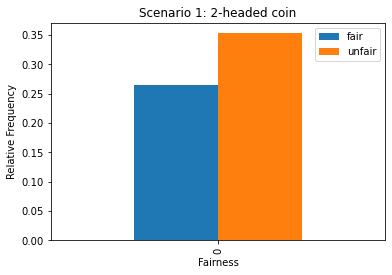

In [20]:
from MonteCarlo import Die, Game, Analyzer

##Scenario 1
fair_coin = Die(["H","T"])

unfair_coin = Die(["H","T"])
unfair_coin.change_weight("H",5)

number_of_flips = 1000

fair_coin_set = [fair_coin, fair_coin, fair_coin]
fair_game = Game(fair_coin_set)
fair_game.play(number_of_flips)

unfair_coin_set = [unfair_coin, unfair_coin, fair_coin]
unfair_game = Game(unfair_coin_set)
unfair_game.play(number_of_flips)

unfair_game_analyzer = Analyzer(unfair_game)
unfair_game_analyzer.get_face_count()
unfair_game_analyzer.get_combo()

fair_game_analyzer = Analyzer(fair_game)
fair_game_analyzer.get_face_count()
fair_game_analyzer.get_combo()
#Same error on GetCombo AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

fair_relative_frequency = fair_game_analyzer.get_jackpot(fair_game)/number_of_flips
unfair_relative_frequency = unfair_game_analyzer.get_jackpot(unfair_game)/number_of_flips

value_df = pd.DataFrame({"fair":[fair_relative_frequency], "unfair": [unfair_relative_frequency]})

#Graph
plt = value_df.plot.bar()
plt.set_xlabel("Fairness")
plt.set_ylabel("Relative Frequency")
plt.set_title("Scenario 1: 2-headed coin")


## Scenario 2

   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0
   Face  Weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0
   Face  Weight
0     1     5.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0
3
3


Text(0.5, 1.0, 'Scenario 2: 6-sided die')

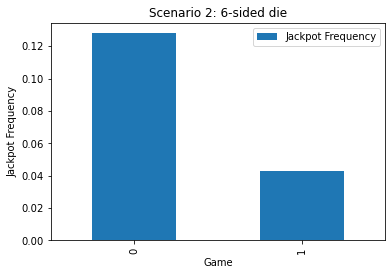

In [21]:
# Code blocks with output

#cenario 2: 6-sided die
    #Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.
    #Play a game of 10000 rolls with 5 fair dice.
    #Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
    #For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
    #Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

unfair_dice_11 = Die([1,2,3,4,5,6])
unfair_dice_11.change_weight(6,5)

unfair_dice_2Type1 = Die([1,2,3,4,5,6])
unfair_dice_2Type1.change_weight(6,5)

unfair_dice_2Type2 = Die([1,2,3,4,5,6])
unfair_dice_2Type2.change_weight(1,5)

unfair_game = Game([unfair_dice_11, unfair_dice_2Type1, unfair_dice_2Type2])
unfair_game.play(1000)
unfair_analyzer = Analyzer(unfair_game)

fair_game = Game([unfair_dice_11, unfair_dice_11, unfair_dice_11])
fair_game.play(1000)
fair_analyzer = Analyzer(fair_game)

unfair_rel_freq = unfair_analyzer.get_jackpot(unfair_game)/1000
all_fair_rel_freq = fair_analyzer.get_jackpot(unfair_game)/1000

Unfair_analyzer_combo = unfair_analyzer.get_combo()

scenario_2_df = pd.DataFrame({'Game':['All Fair Dice','Unfair Dice'], 'Jackpot Frequency': [all_fair_rel_freq, unfair_rel_freq]})

#scenario_2_df = pd.DataFrame({'Game':[all_fair_rel_freq], 'Jackpot Frequency': [unfair_relative_frequency]})

plt = scenario_2_df.plot.bar()
plt.set_xlabel("Game")
plt.set_ylabel("Jackpot Frequency")
plt.set_title("Scenario 2: 6-sided die")


 

## Scenario 3

In [ ]:
# Code blocks with output

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [73]:
%ls -lRF -o
%ls


 Volume in drive C has no label.
 Volume Serial Number is 0C05-53DB

 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info


 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info



File Not Found


 Volume in drive C has no label.
 Volume Serial Number is 0C05-53DB

 Directory of C:\Users\Ben\OneDrive\Documents\UVA 1st Semester\Programming New Github\DS5100-2022-08-O\final-project-info

12/07/2022  10:13 PM    <DIR>          .
12/07/2022  10:13 PM    <DIR>          ..
12/07/2022  10:05 PM    <DIR>          .ipynb_checkpoints
12/07/2022  10:06 PM    <DIR>          __pycache__
12/07/2022  07:05 PM    <DIR>          Archive
12/07/2022  10:13 PM            43,731 FinalProjectSubmissionTemplate.ipynb
12/07/2022  10:15 PM    <DIR>          MonteCarlo.egg-info
12/07/2022  10:06 PM             7,201 MonteCarlo.py
12/07/2022  07:06 PM                 0 montecarlo_test_results.txt
12/06/2022  04:05 PM             1,726 montecarlo_tests.py
12/07/2022  10:06 PM            70,129 MonteCarlo-Main.ipynb
12/07/2022  10:11 PM             3,535 MonteCarloUnitTest.py
12/06/2022  06:46 PM             1,054 ReadMe.txt
12/07/2022  10:11 PM                 0 results.txt
12/07/2022  06:56 PM            

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [ ]:
# Installation commands

In [68]:
!pip install -e .

Obtaining file:///C:/Users/Ben/OneDrive/Documents/UVA%201st%20Semester/Programming%20New%20Github/DS5100-2022-08-O/final-project-info
  Attempting uninstall: MonteCarlo
    Found existing installation: MonteCarlo 3.0.0
    Uninstalling MonteCarlo-3.0.0:
      Successfully uninstalled MonteCarlo-3.0.0
  Running setup.py develop for MonteCarlo
